In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pandas as pd
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,6.5)

In [3]:
# Phys 434 HW 2
# 1. Probability of rolling snake eyes (2 ones) is 1/36, whereas the probability of rolling sevens is 6/36.
#    The ratio of the two probabilities is 1 to 6; 1:6.

   1  2  3   4   5   6
1  2  3  4   5   6   7
2  3  4  5   6   7   8
3  4  5  6   7   8   9
4  5  6  7   8   9  10
5  6  7  8   9  10  11
6  7  8  9  10  11  12


Text(0, 0.5, 'Probability of Each Sum')

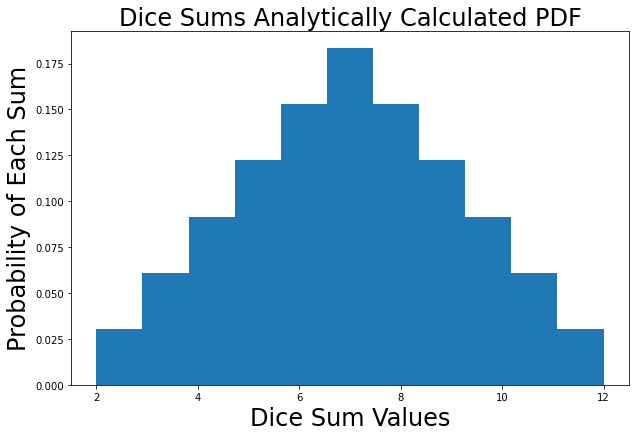

In [4]:
# 2. Convolution on sum of 2 6-sided dice
# Analytical (math and counting):
dice_1 = range(1, 7)
dice_2 = range(1, 7)
sum = [[i+j for i in dice_1] for j in dice_2]
sum_frame = pd.DataFrame(sum, columns = dice_2)
sum_frame.index = dice_1
print(sum_frame)
# print the table of sum values

# print pdf as histogram
flat_arr = np.array(sum).flatten()
plt.hist(flat_arr, bins = 11, density=True)
plt.title("Dice Sums Analytically Calculated PDF", fontsize=24)
plt.xlabel("Dice Sum Values", fontsize=24)
plt.ylabel("Probability of Each Sum", fontsize=24)

Probabilities are [0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


Text(0, 0.5, 'Probability of Each Sum')

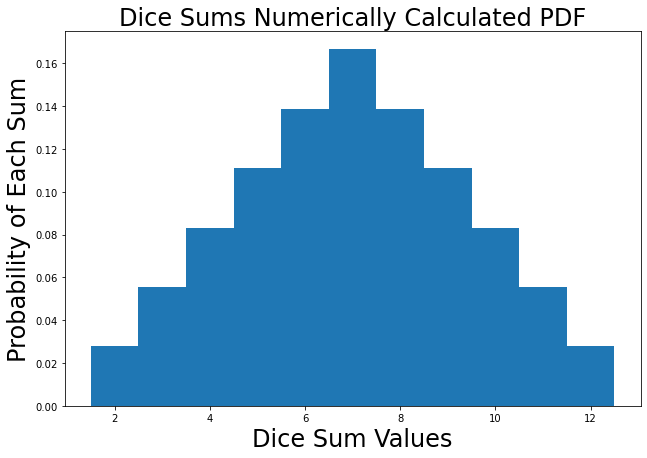

In [5]:
#2: Numerically (computer - numpy.convolve):
p = [num/6 for num in np.ones(6)]
probs = np.convolve(p, p)
print("Probabilities are " + str(probs))

fig = plt.figure(figsize=(8,5.2))
ax = fig.add_axes([0,0,1,1])
ax.bar(range(2,13), probs, width = 1)
plt.title("Dice Sums Numerically Calculated PDF", fontsize=24)
plt.xlabel("Dice Sum Values", fontsize=24)
plt.ylabel("Probability of Each Sum", fontsize=24)

In [26]:
# 3. Mean and Variance
# Mean for this probability distribution refers to the expected value of the sum of rolling two dice, not the simple average 
# of the probabilities.
# re-create convolution for clarity
p = [num/6 for num in np.ones(6)]
probs = np.convolve(p, p)

expected_value = 0
for i in range(0, 11):
    expected_value += probs[i] * (i+2)
print("Mean or expected value is " + str(expected_value))

#Variance
dice_1 = range(1, 7)
dice_2 = range(1, 7)
sum = [[i+j for i in dice_1] for j in dice_2]
print(sum)
print("Variance is " + str(np.var(sum)))
#sum of (xi - mean)^2 * prob(x)

Mean or expected value is 7.0
[[2, 3, 4, 5, 6, 7], [3, 4, 5, 6, 7, 8], [4, 5, 6, 7, 8, 9], [5, 6, 7, 8, 9, 10], [6, 7, 8, 9, 10, 11], [7, 8, 9, 10, 11, 12]]
Variance is 5.833333333333333


Text(0, 0.5, 'Probability')

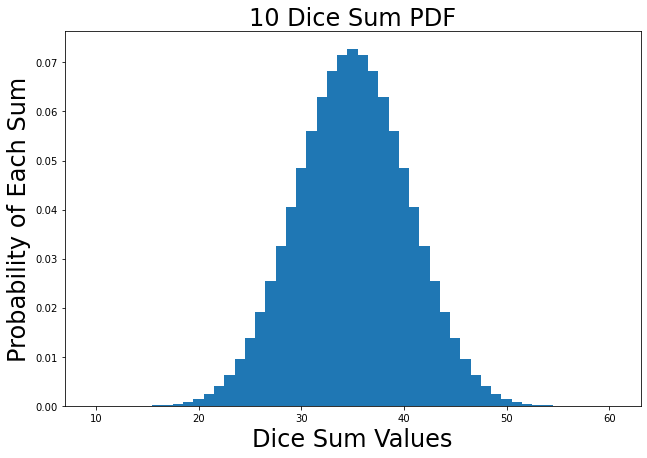

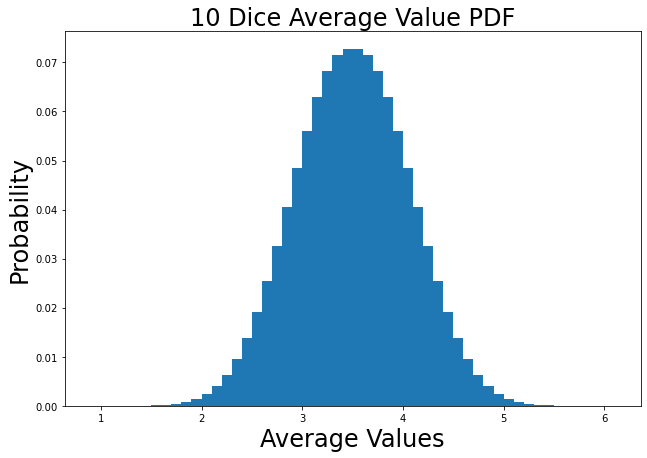

In [24]:
# 4. Average of 10 dice
# Do convolution 10 times
p = [num/6 for num in np.ones(6)]
probs_10_dice = [num/6 for num in np.ones(6)]
# 9 total convolutions because the first convolution uses two dice already
for i in range(9):
    probs_10_dice = np.convolve(p, probs_10_dice)

# plot pdf for sum of 10 dice
x = range(10,61)
fig = plt.figure(figsize=(8,5.2))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, probs_10_dice, width=1)
plt.title("10 Dice Sum PDF", fontsize=24)
plt.xlabel("Dice Sum Values", fontsize=24)
plt.ylabel("Probability of Each Sum", fontsize=24)

# plot pdf for average of 10 dice
x = np.linspace(1,6,51)
fig = plt.figure(figsize=(8,5.2))
ax = fig.add_axes([0,0,1,1])
ax.bar(x, probs_10_dice, width=0.2)
plt.title("10 Dice Average Value PDF", fontsize=24)
plt.xlabel("Average Values", fontsize=24)
plt.ylabel("Probability", fontsize=24)

# While the shape of the graph looks roughly Gaussian, this is not a Gaussian distribution because the values of the average value
# of 10 dice is discrete because there are certain values that are impossible to get. For instance, the smallest average you can
# get is 1, where all 10 dice roll the number 1. The next smallest average is 9 dice rolling one and 1 dice rolling two. In
# this case, the average is 1.1. Thus, the average roll of 10 dice cannot be a decimal value between 1 and 1.1, meaning
# that this distribution is not continuous and is therefore not Gaussian.

(array([2.54430041e-02, 4.24050068e-02, 9.32910150e-02, 1.10253018e-01,
        2.12025034e-01, 4.49493072e-01, 7.12404114e-01, 1.11101118e+00,
        1.80645329e+00, 3.03619849e+00, 4.44404471e+00, 6.17416899e+00,
        8.51492537e+00, 1.07793527e+01, 1.54523845e+01, 2.00745302e+01,
        2.49171820e+01, 2.98531248e+01, 3.55353957e+01, 4.22523488e+01,
        4.67472795e+01, 5.12506912e+01, 5.48211928e+01, 5.63392920e+01,
        5.60509380e+01, 5.46854968e+01, 5.25313224e+01, 4.85198088e+01,
        4.31343729e+01, 3.81475441e+01, 3.18970461e+01, 2.64946482e+01,
        2.11600984e+01, 1.66227627e+01, 1.33490961e+01, 1.01687206e+01,
        6.80176309e+00, 4.81720877e+00, 2.86657846e+00, 2.43404739e+00,
        1.40784623e+00, 8.73543140e-01, 5.76708093e-01, 3.98607064e-01,
        2.37468038e-01, 9.32910150e-02, 5.08860082e-02, 8.48100136e-03,
        8.48100136e-03, 8.48100136e-03]),
 array([2.97147046, 2.97264956, 2.97382867, 2.97500777, 2.97618688,
        2.97736599, 2.9785

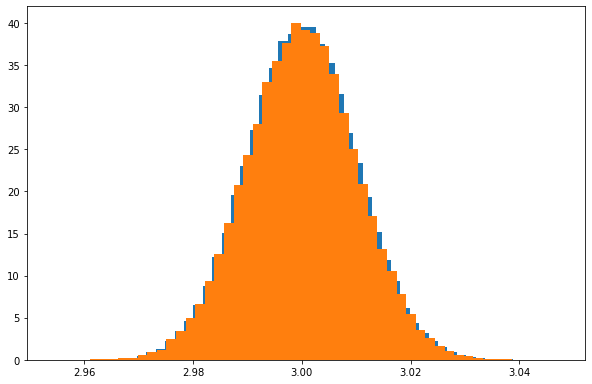

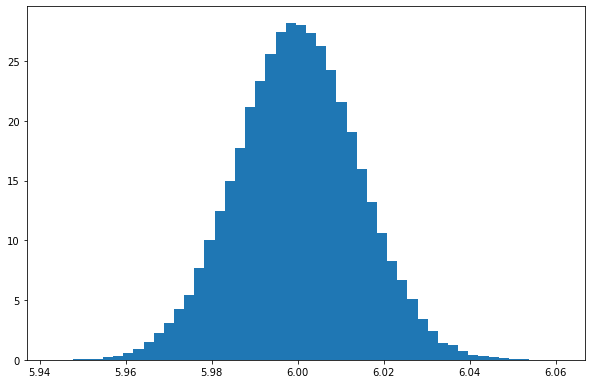

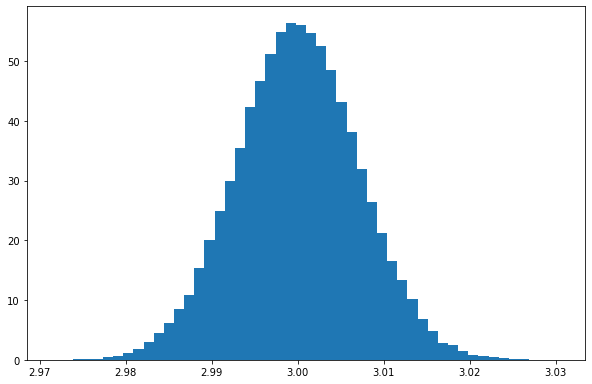

In [31]:
# 5. Show that the sum and average of an initially Gaussian distribution is also a Guassian (can be analytic or numerical). 
# How does the standard deviation of the resulting sum or average Guassian change? This is a hugely important result. 
# Explore what this means for integrating a signal over time.

a = stats.norm.rvs(loc = 3.0, scale = .01, size = 100000)
b = stats.norm.rvs(loc = 3.0, scale = .01, size = 100000)
fig, ax = plt.subplots(1, 1)
ax.hist(a,50, density=True)
ax.hist(b,50, density=True)
fig, ax = plt.subplots(1, 1)
ax.hist(a+b,50, density=True)
fig, ax = plt.subplots(1, 1)
ax.hist((a+b)/2,50, density=True)
# As we can see from the following plots of the shifted normal distributions, when we add the two original Gaussian distributions
# the mean of the new distribution is twice that of the original, and the variance or spread of the distribution also doubled
# which means the square of the standard deviation is the sum of the squares of the two original distributions. 
# The average would also be normally distributed because if the sum distribution is normally distributed, the average distribution
# is just the sum distribution divided by a factor of two. The mean and variance would also be the average of the two
# original distributions.